In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
from scipy.stats import linregress, norm
from scipy.integrate import dblquad
import ot

In [2]:
rng = default_rng(seed=42)

In [3]:
import numpy as np


nopde_noiselv01_n50_alpha1 = np.load('noiselv01_n50_alpha1_nopde_u1_1.npy')
nopde_noiselv01_n500_alpha1= np.load('noiselv01_n500_alpha1_nopde_u1_1.npy')
nopde_noiselv01_n1000_alpha1 = np.load('noiselv01_n1000_alpha1_nopde_u1_1.npy')
nopde_noiselv01_n5000_alpha1 = np.load('noiselv01_n5000_alpha1_nopde_u1_1.npy')

nopde_noiselv10_n500_alpha1= np.load('noiselv10_n500_alpha1_nopde_u1_1.npy')
nopde_noiselv10_n1000_alpha1 = np.load('noiselv10_n1000_alpha1_nopde_u1_1.npy')
nopde_noiselv10_n5000_alpha1 = np.load('noiselv10_n5000_alpha1_nopde_u1_1.npy')
nopde_noiselv10_n10000_alpha1 = np.load('noiselv10_n10000_alpha1_nopde_u1_1.npy')

nopde_noiselv25_n5000_alpha1 = np.load('noiselv25_n5000_alpha1_nopde_u1_1.npy')
nopde_noiselv25_n1000_alpha1 = np.load('noiselv25_n1000_alpha1_nopde_u1_1.npy')

nopde_noiselv50_n5000_alpha1 = np.load('noiselv50_n5000_alpha1_nopde_u1_1.npy')


pde_noiselv01_n50_alpha1 = np.load('noiselv01_n50_alpha1_pde_u1_1_nosigma.npy')
pde_noiselv01_n500_alpha1 = np.load('noiselv01_n500_alpha1_pde_u1_1_nosigma.npy')
pde_noiselv01_n1000_alpha1 = np.load('noiselv01_n1000_alpha1_pde_u1_1_nosigma.npy')
pde_noiselv01_n5000_alpha1 = np.load('noiselv01_n5000_alpha1_pde_u1_1_nosigma.npy')


pde_noiselv10_n500_alpha1 = np.load('noiselv10_n500_alpha1_pde_u1_1_nosigma.npy')
pde_noiselv10_n1000_alpha1 = np.load('noiselv10_n1000_alpha1_pde_u1_1_nosigma.npy')
pde_noiselv10_n5000_alpha1 = np.load('noiselv10_n5000_alpha1_pde_u1_1_nosigma.npy')
pde_noiselv10_n10000_alpha1 = np.load('noiselv10_n10000_alpha1_pde_u1_1_nosigma.npy')

pde_noiselv25_n1000_alpha1 = np.load('noiselv25_n1000_alpha1_pde_u1_1_nosigma.npy')
pde_noiselv25_n5000_alpha1 = np.load('noiselv25_n5000_alpha1_pde_u1_1_nosigma.npy')

pde_noiselv50_n5000_alpha1 = np.load('noiselv50_n5000_alpha1_pde_u1_1_nosigma.npy')


# PDE compare noPDE

In [4]:
n_actual = [500, 1000, 5000, 10000]


pde_plot_values = [pde_noiselv10_n500_alpha1, pde_noiselv10_n1000_alpha1, 
               pde_noiselv10_n5000_alpha1, pde_noiselv10_n10000_alpha1]

nopde_plot_values = [nopde_noiselv10_n500_alpha1, nopde_noiselv10_n1000_alpha1, 
               nopde_noiselv10_n5000_alpha1, nopde_noiselv10_n10000_alpha1]



plot_values =pde_plot_values

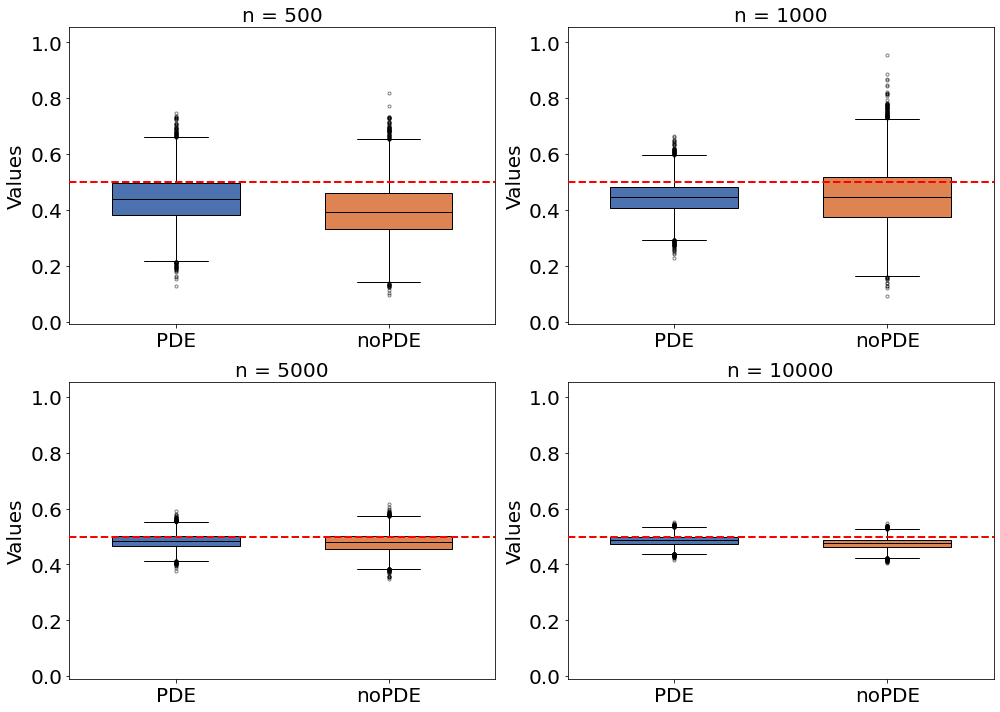

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you have all data
pde_plot_values = [
    pde_noiselv10_n500_alpha1, pde_noiselv10_n1000_alpha1,
    pde_noiselv10_n5000_alpha1, pde_noiselv10_n10000_alpha1
]
nopde_plot_values = [
    nopde_noiselv10_n500_alpha1, nopde_noiselv10_n1000_alpha1,
    nopde_noiselv10_n5000_alpha1, nopde_noiselv10_n10000_alpha1
]
n_actual = [500, 1000, 5000, 10000]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Set seaborn style without background grid
sns.set_style("white")

# Use seaborn color palette with more visually appealing colors
palette = sns.color_palette("deep", 2)
pde_color = palette[0]
nopde_color = palette[1]

# Find min and max for the pairs 500 & 1000, and 5000 & 10000
y_min_1 = min(min(pde_plot_values[0]), min(nopde_plot_values[0]), min(pde_plot_values[1]), min(nopde_plot_values[1]))
y_max_1 = max(max(pde_plot_values[0]), max(nopde_plot_values[0]), max(pde_plot_values[1]), max(nopde_plot_values[1]))
y_min_2 = min(min(pde_plot_values[2]), min(nopde_plot_values[2]), min(pde_plot_values[3]), min(nopde_plot_values[3]))
y_max_2 = max(max(pde_plot_values[2]), max(nopde_plot_values[2]), max(pde_plot_values[3]), max(nopde_plot_values[3]))

for i, n in enumerate(n_actual):
    ax = axes[i]
    data = [pde_plot_values[i], nopde_plot_values[i]]
    # Boxplot with seaborn
    bp = ax.boxplot(data, labels=['PDE', 'noPDE'], patch_artist=True, widths=0.6,
                    medianprops=dict(color="black"),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    flierprops=dict(marker='.', color='black', alpha=0.5))
    
    # Set colors for each box
    colors = [pde_color, nopde_color]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(f'n = {n}', fontsize=20)
    ax.set_ylabel('Values', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)

    # Ensure similar y-axis scale for pairs of plots
    if n in [500, 1000]:
        ax.set_ylim([y_min_1 - 0.1, y_max_1 + 0.1])
    else:
        ax.set_ylim([y_min_1 - 0.1, y_max_1 + 0.1])

    # Plot red dotted line at y=0.5
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=2, zorder=3)

plt.tight_layout()
plt.savefig('box_all_ns_pdenopde_sig10.pdf', format='pdf', dpi=300)
plt.show()


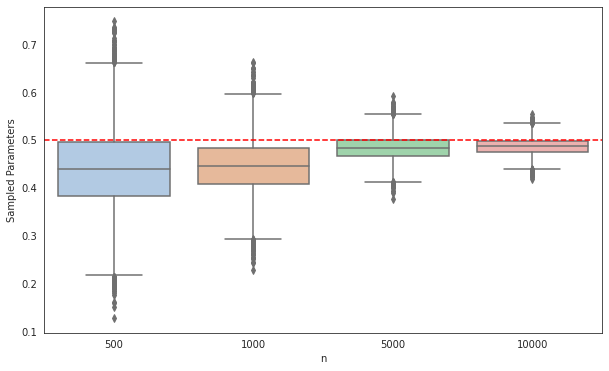

In [6]:
import pandas as pd
box_data = {
    'Value': np.concatenate(plot_values),
    'n': np.concatenate([np.repeat(n_actual[i], len(arr)) for i, arr in enumerate(plot_values)])
}
                        
box_data = pd.DataFrame(box_data)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='n', y='Value', data=box_data, palette='pastel', saturation=0.6)

# Add a horizontal line at y=0.5 across the entire plot in red color
plt.axhline(y=0.5, color='red', linestyle='--')


plt.ylabel('Sampled Parameters')
plt.xlabel('n')

plt.savefig('box_all_ns_pde_sig10.pdf', format='pdf', dpi=300)
plt.show()

In [7]:
np.mean(nopde_noiselv10_n1000_alpha1)

0.4489706265911091

In [8]:
np.mean(pde_noiselv10_n1000_alpha1)

0.44500673905884713

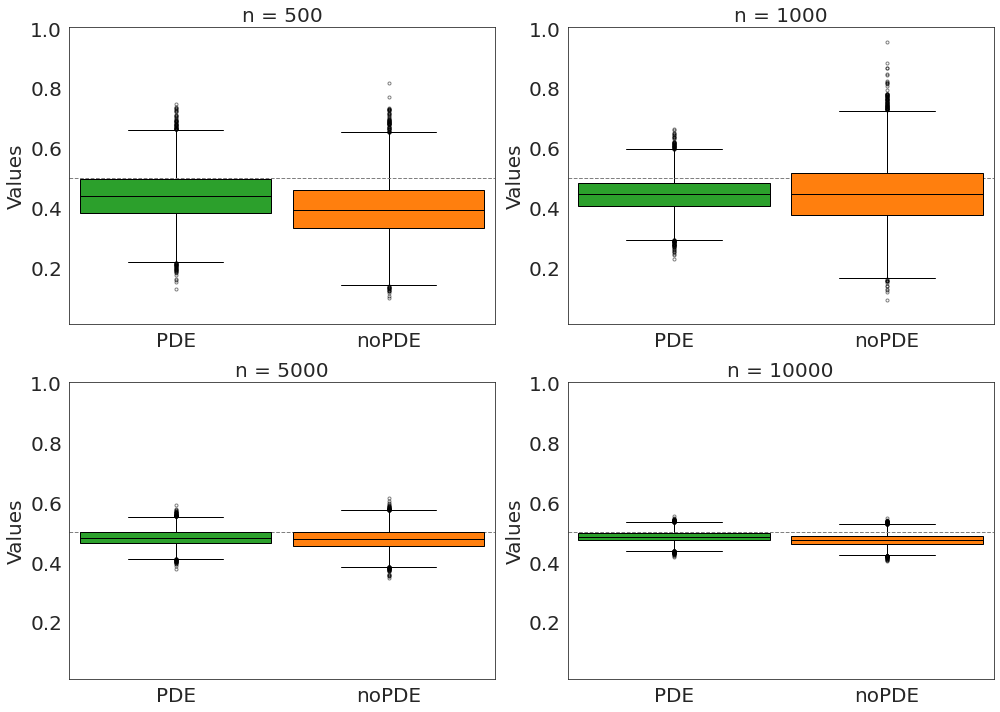

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
pde_plot_values = [
    pde_noiselv10_n500_alpha1, pde_noiselv10_n1000_alpha1,
    pde_noiselv10_n5000_alpha1, pde_noiselv10_n10000_alpha1
]
nopde_plot_values = [
    nopde_noiselv10_n500_alpha1, nopde_noiselv10_n1000_alpha1,
    nopde_noiselv10_n5000_alpha1, nopde_noiselv10_n10000_alpha1
]
n_actual = [500, 1000, 5000, 10000]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Set more contrasting colors
pde_color = "#2ca02c"  # Green
nopde_color = "#ff7f0e"  # Orange

# Find min and max for the pairs 500 & 1000, and 5000 & 10000
y_min_1 = min(min(pde_plot_values[0]), min(nopde_plot_values[0]), min(pde_plot_values[1]), min(nopde_plot_values[1]))
y_max_1 = max(max(pde_plot_values[0]), max(nopde_plot_values[0]), max(pde_plot_values[1]), max(nopde_plot_values[1]))
y_min_2 = min(min(pde_plot_values[2]), min(nopde_plot_values[2]), min(pde_plot_values[3]), min(nopde_plot_values[3]))
y_max_2 = max(max(pde_plot_values[2]), max(nopde_plot_values[2]), max(pde_plot_values[3]), max(nopde_plot_values[3]))

for i, n in enumerate(n_actual):
    ax = axes[i]
    data = [pde_plot_values[i], nopde_plot_values[i]]
    # Boxplot with wider boxes and contrasting colors
    bp = ax.boxplot(data, labels=['PDE', 'noPDE'], patch_artist=True, widths=0.9,
                    medianprops=dict(color="black"),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    flierprops=dict(marker='.', color='black', alpha=0.5))
    
    # Set colors for each box
    colors = [pde_color, nopde_color]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
    ax.set_title(f'n = {n}', fontsize=20)
    ax.set_ylabel('Values', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)

    # Ensure similar y-axis scale for pairs of plots
    if n in [500, 1000]:
        ax.set_ylim([y_min_1 - 0.08, y_max_1 + 0.05])
    else:
        ax.set_ylim([y_min_1 - 0.08, y_max_1 + 0.05])

plt.tight_layout()

plt.savefig('box_all_ns_pdenopde_sig10.pdf', format='pdf', dpi=300)

plt.show()


In [10]:
plot_values

[array([0.48040362, 0.39960869, 0.41773035, ..., 0.36208849, 0.37863123,
        0.42080365]),
 array([0.4578473 , 0.41584614, 0.42354205, ..., 0.42377689, 0.41680901,
        0.49292297]),
 array([0.49674807, 0.51269706, 0.49110386, ..., 0.46878745, 0.46644123,
        0.50132082]),
 array([0.49419785, 0.44427958, 0.49765988, ..., 0.48890397, 0.48287148,
        0.47692084])]

In [11]:
k = 0.5
mea_sig = 1
def u_star(x, t):
    return np.sin(x)*np.exp(-k*t)
def du_dx_star(x,t):
    return np.cos(x)*np.exp(-k*t)
def d2u_dxx_star(x,t):
    return -np.sin(x)*np.exp(-k*t)
def du_dt_star(x,t):
    return -k*np.sin(x)*np.exp(-k*t)



In [12]:
x_lower = 0
x_upper = np.pi
t_lower = 0
t_upper = 1
stdev_star = []

def fun_to_int(x,t):
    return (d2u_dxx_star(x,t))**2 
integral_result, _ = dblquad(fun_to_int, t_lower, t_upper, lambda t: x_lower, lambda t: x_upper)
print(integral_result)
# Set the integration limits

#for N_M in n_actual:
#    temp = (integral_result + (mea_sig**2)/N_M)
#    temp = (mea_sig**2)/N_M * 1/(temp)
#    stdev_star.append(np.sqrt(temp))

0.9929326518994357


In [13]:
def genTargetNormal(ns, integral_result, gen_size):
    res = []
    for nn in ns:
        temp = (integral_result + (1)/nn)
        temp = (1)/nn * 1/(temp)
        stdev_star = np.sqrt(temp)
        theta_sample_star = rng.normal(0.5, stdev_star, gen_size)
        res.append(theta_sample_star)
    return res

In [14]:
target_values = genTargetNormal(n_actual, integral_result, len(plot_values[0]))

In [15]:
len(plot_values[0])

10001

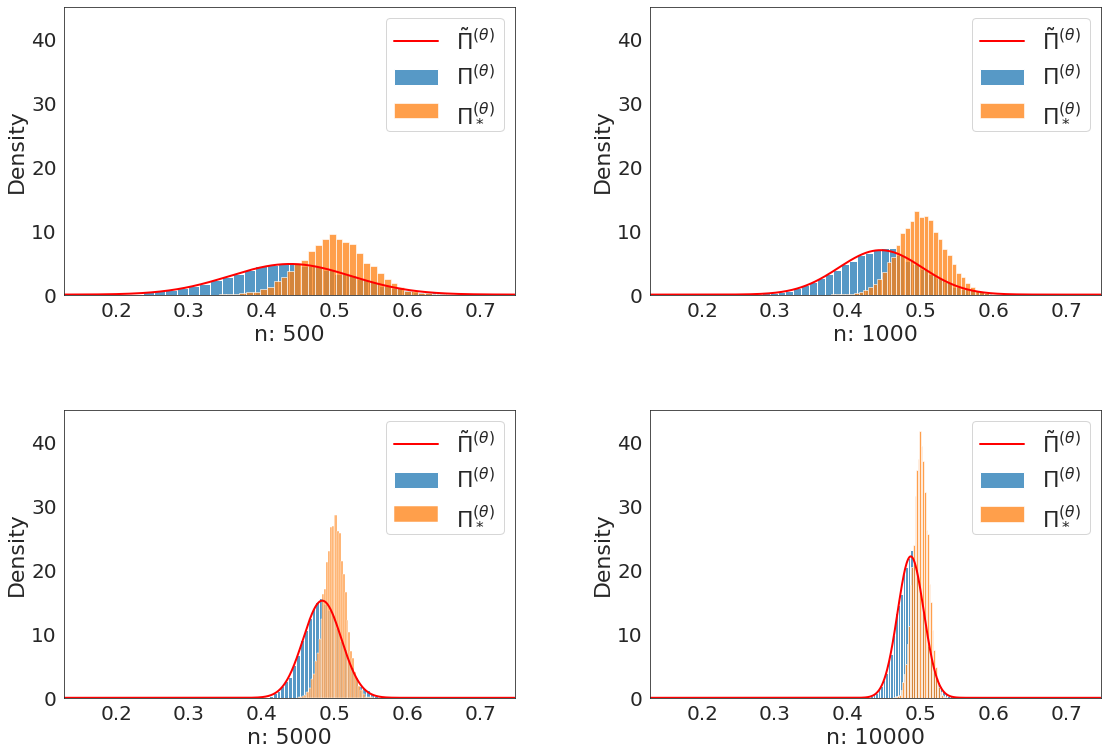

In [57]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import norm
import seaborn as sns

# Assuming plot_values, target_values, and n_actual are defined
# plot_values: list of lists, each containing the data to plot
# target_values: list of lists, each containing the target data to plot
# n_actual: list of sample sizes for the data

# Set larger font sizes
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 22

# Setup for a 2x2 grid (assuming you have 4 datasets to plot)
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 2)

# Adjusting the spacing between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.4, left=0.1, right=0.9, top=0.9, bottom=0.1)

# Determine global x-axis and y-axis limits
all_data = [item for sublist in plot_values for item in sublist]
all_target_data = [item for sublist in target_values for item in sublist]

global_min = min(min(all_data), min(all_target_data))
global_max = max(max(all_data), max(all_target_data))

# Calculate global y-axis limit
all_hist_data = np.concatenate(plot_values + target_values)
y_max = 45
    


# Iterating through each dataset and its label for plotting
for i, (data, target_data, label) in enumerate(zip(plot_values, target_values, n_actual)):
    ax = plt.subplot(gs[i])
    
    # Plot data histogram
    sns.histplot(data, bins=40, kde=False, color='#1f77b4', stat="density", ax=ax, label=r'$\Pi^{(\theta)}$')
    
    # Plot target data histogram
    sns.histplot(target_data, bins=40, kde=False, color='#ff7f0e', stat="density", ax=ax, label=r'$\Pi_*^{(\theta)}$')
    
    ax.set_xlim(global_min, global_max)
    ax.set_ylim(0, y_max)
    ax.set_xlabel(f'n: {label}', fontsize=22)  # Including sample size in x-axis label
    ax.set_ylabel('Density', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    # Calculate mean and standard deviation of the sampled data
    mean, std = np.mean(data), np.std(data)
    
    # Generate points on the x-axis
    x = np.linspace(global_min, global_max, 1000)
    
    # Calculate the normal distribution's PDF
    pdf = norm.pdf(x, mean, std)
    
    # Plot the normal distribution curve for data
    ax.plot(x, pdf, color='red', linewidth=2, label=r'$\tilde\Pi^{(\theta)}$')
    
    # Add legend to each subplot
    ax.legend(fontsize=22, loc='upper right')

plt.savefig('hist_all_ns_pde_sig10.pdf', format='pdf', dpi=300)
plt.show()


In [17]:
def TV_upper(mu1, mu2, sig1, sig2):
    return 3*abs(sig1**2-sig2**2) / (2*(max(sig1, sig2)**2)) + abs(mu1-mu2) / (2*(max(sig1, sig2)))

def TV_lower(mu1, mu2, sig1, sig2):
    term1 = abs(sig1**2-sig2**2) / (min(sig1, sig2)**2)
    term2 = 40*abs(mu1-mu2) / (min(sig1, sig2))
    return min(1, max(term1, term2)) / 200

In [18]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from numpy import inf

def approx_total_variation_distance(mean1, mean2, std1, std2):
    # Compute the Gaussian PDFs using SciPy
    pdf_diff = lambda x: 0.5*abs(norm.pdf(x, loc=mean1, scale=std1) - norm.pdf(x, loc=mean2, scale=std2))
    est, err = quad(pdf_diff, -inf, inf)

    return est-err, est+err

def approx_total_variation_distance(mean1, mean2, std1, std2):
    # Compute the Gaussian PDFs using SciPy
    pdf_diff = lambda x: 0.5 * abs(norm.pdf(x, loc=mean1, scale=std1) - norm.pdf(x, loc=mean2, scale=std2))
    
    # Determine the integration bounds based on the standard deviations
    integration_bound = 10 * max(std1, std2)
    
    # Integrate over the finite interval
    est, err = quad(pdf_diff, -integration_bound, integration_bound)

    return est - err, est + err

In [40]:
def tvd_upper_bound(mean0, mean1, std0, std1):
    """
    Calculate the upper bound for the total variation distance (TVD) using Pinsker's inequality
    between two normal distributions.
    
    Parameters:
    mean0 (float): Mean of the first normal distribution.
    std0 (float): Standard deviation of the first normal distribution.
    mean1 (float): Mean of the second normal distribution.
    std1 (float): Standard deviation of the second normal distribution.
    
    Returns:
    float: The upper bound for the TVD.
    """
    # Calculate KL divergence N0 || N1
    kl_01 = np.log(std1 / std0) + (std0**2 + (mean0 - mean1)**2) / (2 * std1**2) - 0.5
    
    # Calculate KL divergence N1 || N0
    kl_10 = np.log(std0 / std1) + (std1**2 + (mean1 - mean0)**2) / (2 * std0**2) - 0.5
    
    # Use the minimum KL divergence for Pinsker's inequality
    min_kl = min(kl_01, kl_10)
    
    # Calculate the upper bound for TVD using Pinsker's inequality
    out = np.sqrt(0.5 * min_kl)
    
    return min(1, out)

def tvd_lower_bound(mean0, mean1, std0, std1):
    """
    Calculate the lower bound for the total variation distance (TVD) using the Hellinger distance
    between two normal distributions.
    
    Parameters:
    mean0 (float): Mean of the first normal distribution.
    std0 (float): Standard deviation of the first normal distribution.
    mean1 (float): Mean of the second normal distribution.
    std1 (float): Standard deviation of the second normal distribution.
    
    Returns:
    float: The lower bound for the TVD.
    """
    # Calculate the Hellinger distance squared
    term1 = np.sqrt(2 * std0 * std1 / (std0**2 + std1**2))
    term2 = np.exp(-(mean0 - mean1)**2 / (4 * (std0**2 + std1**2)))
    h_squared = 1 - term1 * term2

    return h_squared

def tvd_upper_Hell(mean0, mean1, std0, std1):
    """
    Calculate the lower and upper bounds for the total variation distance (TVD) using the Hellinger distance
    between two normal distributions.
    
    Parameters:
    mean0 (float): Mean of the first normal distribution.
    std0 (float): Standard deviation of the first normal distribution.
    mean1 (float): Mean of the second normal distribution.
    std1 (float): Standard deviation of the second normal distribution.
    
    Returns:
    tuple: A tuple containing the lower bound and the upper bound for the TVD.
    """
    # Calculate the Hellinger distance squared
    term1 = np.sqrt(2 * std0 * std1 / (std0**2 + std1**2))
    term2 = np.exp(-(mean0 - mean1)**2 / (4 * (std0**2 + std1**2)))
    h_squared = 1 - term1 * term2

    # Hellinger distance
    h_distance = np.sqrt(h_squared)
    out = np.sqrt(2) * h_distance
    
    return out


In [41]:
integral_result

0.9929326518994357

In [21]:
W2_dists = []
l1_dists = []
sample_stdevs = []
sample_means = []
stdev_stars = []
TV_uppers = []
TV_lowers = []
approx_TVs = []
W2_tilde = []
for idx in range(len(n_actual)):
    nn = n_actual[idx]
    theta_sample = plot_values[idx]
    
    sample_stdevs.append(np.std(theta_sample))
    sample_means.append(np.mean(theta_sample))
    
    temp = (integral_result + (mea_sig**2)/nn)
    temp = (mea_sig**2)/nn * 1/(temp)
    stdev_star = np.sqrt(temp)
    stdev_stars.append(stdev_star)
    theta_sample_star = rng.normal(k, stdev_star, len(theta_sample))
    theta_tilde = rng.normal(np.mean(theta_sample), np.std(theta_sample), len(theta_sample))
    W2_tilde.append( ot.emd2_1d(theta_sample, theta_tilde))
    #approx_TVs.append(approx_total_variation_distance(np.mean(theta_sample), k, np.std(theta_sample), stdev_star))

    TV_uppers.append(tvd_upper_bound(np.mean(theta_sample), k, np.std(theta_sample), stdev_star))
    TV_lowers.append(tvd_lower_bound(np.mean(theta_sample), k, np.std(theta_sample), stdev_star))
    
    #TV_lowers.append(TV_lower(np.mean(theta_sample), k, np.std(theta_sample), stdev_star))

    W2_dists.append(ot.emd2_1d(theta_sample, theta_sample_star, p=2.0))
    l1_dists.append(np.sqrt(np.mean(theta_sample - k)**2))

In [22]:
W2_tilde

[2.0420614755334067e-06,
 1.6974730479307772e-06,
 6.919269974877572e-07,
 8.965897851705527e-08]

In [23]:
n_actual

[500, 1000, 5000, 10000]

In [24]:
np.array(sample_stdevs) / np.array(stdev_stars)

array([1.85958872, 1.81123254, 1.85227683, 1.79913231])

In [25]:
W2_dists

[0.005097353281773158,
 0.0036932348396379417,
 0.000430105853521297,
 0.0002471429802797723]

In [26]:
l1_dists

[0.0608363261947907,
 0.054993260941152824,
 0.016963905790447032,
 0.013594459113495013]

In [27]:
TV_uppers

[0.5153423943339555,
 0.5935316570773144,
 0.4849740962091601,
 0.5124744378023083]

In [28]:
TV_lowers

[0.1762226498622257,
 0.22819291619542548,
 0.15646097626637567,
 0.17302076266025934]

In [29]:
def plot_lr(x_n, y_n):


    # Plotting
    slope, intercept, _, _, _ = linregress(x_n, y_n)
    print(slope)

    # Define the extended x range for plotting the line
    x_extended = np.linspace(x_n.min() - 0.5, x_n.max() + 0.5, 1000)  # Extend 1 unit beyond the data range on both sides

    # Calculate the y values for the extended line
    y_extended = slope * x_extended + intercept

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_n, y=y_n, color='red')  # Plot the points in red
    plt.plot(x_extended, y_extended, color='blue', label='Linear Fit') 

    plt.xlabel(r'log(n)')
    #plt.ylabel(r'log of average l1 difference')
    plt.show()

In [30]:
n_actual = np.array(n_actual)

-0.5518581872861329


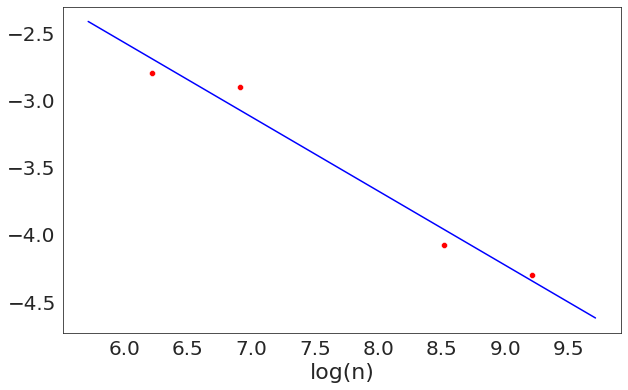

In [31]:
plot_lr(np.log(n_actual), np.log(l1_dists))

In [32]:
df = pd.DataFrame(data={'u':n_actual, 'mean_theta_k':sample_means, 'stdev_theta_k':sample_stdevs, 'rmse':l1_dists, 'W2 dist':W2_dists, 'TV upper': TV_uppers, 'TV lower':TV_lowers})

In [33]:
df

,u,mean_theta_k,stdev_theta_k,rmse,W2 dist,TV upper,TV lower
0,500,0.439164,0.083375,0.060836,0.005097,0.515342,0.176223
1,1000,0.445007,0.057451,0.054993,0.003693,0.593532,0.228193
2,5000,0.483036,0.026286,0.016964,0.000430,0.484974,0.156461
3,10000,0.486406,0.018054,0.013594,0.000247,0.512474,0.173021


In [35]:
mea_sig

1

In [36]:
k

0.5

In [42]:
import numpy as np
import ot  # Optimal Transport
import pandas as pd

# Define your functions TV_upper, TV_lower, etc. if not already defined.
# Assuming rng, integral_result, mea_sig, k are defined

def TV_upper(mu1, mu2, sig1, sig2):
    return 3*abs(sig1**2-sig2**2) / (2*(max(sig1, sig2)**2)) + abs(mu1-mu2) / (2*(max(sig1, sig2)))
def TV_lower(mu1, mu2, sig1, sig2):
    term1 = abs(sig1**2-sig2**2) / (min(sig1, sig2)**2)
    term2 = 40*abs(mu1-mu2) / (min(sig1, sig2))
    return min(1, max(term1, term2)) / 200

# Load datasets
datasets = {
    'nopde': {
        'noiselv01': {
            50: np.load('noiselv01_n50_alpha1_nopde_u1_1.npy'),
            500: np.load('noiselv01_n500_alpha1_nopde_u1_1.npy'),
            1000: np.load('noiselv01_n1000_alpha1_nopde_u1_1.npy'),
            5000: np.load('noiselv01_n5000_alpha1_nopde_u1_1.npy')
        },
        'noiselv10': {
            500: np.load('noiselv10_n500_alpha1_nopde_u1_1.npy'),
            1000: np.load('noiselv10_n1000_alpha1_nopde_u1_1.npy'),
            5000: np.load('noiselv10_n5000_alpha1_nopde_u1_1.npy'),
            10000: np.load('noiselv10_n10000_alpha1_nopde_u1_1.npy')
        },
        'noiselv25': {
            1000: np.load('noiselv25_n1000_alpha1_nopde_u1_1.npy'),
            5000: np.load('noiselv25_n5000_alpha1_nopde_u1_1.npy')
        },
        'noiselv50': {
            5000: np.load('noiselv50_n5000_alpha1_nopde_u1_1.npy')
        }
    },
    'pde': {
        'noiselv01': {
            50: np.load('noiselv01_n50_alpha1_pde_u1_1_nosigma.npy'),
            500: np.load('noiselv01_n500_alpha1_pde_u1_1_nosigma.npy'),
            1000: np.load('noiselv01_n1000_alpha1_pde_u1_1_nosigma.npy'),
            5000: np.load('noiselv01_n5000_alpha1_pde_u1_1_nosigma.npy')
        },
        'noiselv10': {
            500: np.load('noiselv10_n500_alpha1_pde_u1_1_nosigma.npy'),
            1000: np.load('noiselv10_n1000_alpha1_pde_u1_1_nosigma.npy'),
            5000: np.load('noiselv10_n5000_alpha1_pde_u1_1_nosigma.npy'),
            10000: np.load('noiselv10_n10000_alpha1_pde_u1_1_nosigma.npy'),
        },
        'noiselv25': {
            1000: np.load('noiselv25_n1000_alpha1_pde_u1_1_nosigma.npy'),
            5000: np.load('noiselv25_n5000_alpha1_pde_u1_1_nosigma.npy')
        },
        'noiselv50': {
            5000: np.load('noiselv50_n5000_alpha1_pde_u1_1_nosigma.npy')
        }
    }
}

# Assuming plot_values, target_values, and n_actual are defined lists
# Placeholder for demo purposes, replace these with actual data
#plot_values = []  # Your actual plot values go here
#target_values = []  # Your actual target values go here
#n_actual = []  # Your actual sample sizes go here

# Calculate statistics
results = []

for category, noise_levels in datasets.items():
    for noise_level, samples in noise_levels.items():
        for n, data in samples.items():
            theta_sample = data
            
            sample_std = np.std(theta_sample)
            sample_mean = np.mean(theta_sample)
            
            temp = (integral_result + (mea_sig**2) / n)
            temp = (mea_sig**2) / n * 1 / temp
            stdev_star = np.sqrt(temp)
            
            theta_sample_star = rng.normal(k, stdev_star, len(theta_sample))
            theta_tilde = rng.normal(np.mean(theta_sample), np.std(theta_sample), len(theta_sample))
            
            W2_tilde_value = ot.emd2_1d(theta_sample, theta_tilde)
            #TV_upper_value = TV_upper(np.mean(theta_sample), k, np.std(theta_sample), stdev_star)
            #TV_lower_value = TV_lower(np.mean(theta_sample), k, np.std(theta_sample), stdev_star)
            
            TV_upper_value = tvd_upper_bound(np.mean(theta_sample), k, np.std(theta_sample), stdev_star)
            TV_lower_value = tvd_lower_bound(np.mean(theta_sample), k, np.std(theta_sample), stdev_star)
            #TV_est = approx_total_variation_distance(np.mean(theta_sample), k, np.std(theta_sample), stdev_star)
    
            TV_upper_H = tvd_upper_Hell(np.mean(theta_sample), k, np.std(theta_sample), stdev_star)
            
            
            
            W2_dist = ot.emd2_1d(theta_sample, theta_sample_star, p=2.0)
            rmse_value = np.sqrt(np.mean((theta_sample - k)**2))
            l1_diff = np.mean(np.abs(theta_sample - k))
            
            results.append([category, noise_level, n, sample_mean, sample_std, l1_diff, rmse_value, W2_dist, TV_upper_value, TV_lower_value, TV_upper_H])

# Convert results to DataFrame
columns = ['pde/nopde', 'noise lv', 'n', 'sample_means', 'sample_std', 'l1-diff', 'rmse', 'W2_dists', 'TV upper', 'TV lower', 'TV upper H']
df_results = pd.DataFrame(results, columns=columns)

# Print the DataFrame
print(df_results)

# Save to a CSV file if needed
df_results.to_csv('statistics_results.csv', index=False)


   pde/nopde   noise lv      n  sample_means  sample_std   l1-diff      rmse  \
0      nopde  noiselv01     50      0.266117    0.262984  0.293232  0.351940   
1      nopde  noiselv01    500      0.468465    0.081956  0.070624  0.087814   
2      nopde  noiselv01   1000      0.480865    0.057191  0.048276  0.060307   
3      nopde  noiselv01   5000      0.488354    0.025487  0.022398  0.028021   
4      nopde  noiselv10    500      0.397047    0.094341  0.117267  0.139640   
5      nopde  noiselv10   1000      0.448971    0.104253  0.094261  0.116072   
6      nopde  noiselv10   5000      0.479676    0.034741  0.032291  0.040250   
7      nopde  noiselv10  10000      0.475651    0.019318  0.026258  0.031082   
8      nopde  noiselv25   1000      0.129528    0.069725  0.370482  0.376977   
9      nopde  noiselv25   5000      0.425118    0.072185  0.086811  0.104010   
10     nopde  noiselv50   5000      0.026053    0.017968  0.473947  0.474288   
11       pde  noiselv01     50      0.32

In [43]:
df_results

,pde/nopde,noise lv,n,sample_means,sample_std,l1-diff,rmse,W2_dists,TV upper,TV lower,TV upper H
0,nopde,noiselv01,50,0.266117,0.262984,0.293232,0.351940,0.069746,0.576621,0.218236,0.660660
1,nopde,noiselv01,500,0.468465,0.081956,0.070624,0.087814,0.002396,0.404265,0.108113,0.465000
2,nopde,noiselv01,1000,0.480865,0.057191,0.048276,0.060307,0.001026,0.386814,0.098472,0.443784
3,nopde,noiselv01,5000,0.488354,0.025487,0.022398,0.028021,0.000264,0.415306,0.114028,0.477552
4,nopde,noiselv10,500,0.397047,0.094341,0.117267,0.139640,0.013210,0.690038,0.309321,0.786538
5,nopde,noiselv10,1000,0.448971,0.104253,0.094261,0.116072,0.007869,0.654210,0.293524,0.766190
6,nopde,noiselv10,5000,0.479676,0.034741,0.032291,0.040250,0.000833,0.570031,0.222421,0.666964
7,nopde,noiselv10,10000,0.475651,0.019318,0.026258,0.031082,0.000681,0.736287,0.338424,0.822707
8,nopde,noiselv25,1000,0.129528,0.069725,0.370482,0.376977,0.138620,1.000000,0.997494,1.412440
9,nopde,noiselv25,5000,0.425118,0.072185,0.086811,0.104010,0.008988,0.917611,0.525134,1.024826


In [44]:
df_results[df_results['pde/nopde'] == 'pde']

,pde/nopde,noise lv,n,sample_means,sample_std,l1-diff,rmse,W2_dists,TV upper,TV lower,TV upper H
11,pde,noiselv01,50,0.326360,0.227898,0.232287,0.286511,0.038592,0.481623,0.149109,0.546093
12,pde,noiselv01,500,0.474988,0.078832,0.066141,0.082705,0.001863,0.371749,0.090385,0.425170
13,pde,noiselv01,1000,0.486277,0.055988,0.046088,0.057645,0.000798,0.359675,0.084315,0.410646
14,pde,noiselv01,5000,0.491105,0.025424,0.021468,0.026935,0.000206,0.387339,0.098691,0.444277
15,pde,noiselv10,500,0.439164,0.083375,0.083565,0.103211,0.005250,0.515342,0.176223,0.593671
16,pde,noiselv10,1000,0.445007,0.057451,0.065317,0.079529,0.003732,0.593532,0.228193,0.675563
17,pde,noiselv10,5000,0.483036,0.026286,0.025335,0.031284,0.000431,0.484974,0.156461,0.559394
18,pde,noiselv10,10000,0.486406,0.018054,0.018293,0.022600,0.000248,0.512474,0.173021,0.588253
19,pde,noiselv25,1000,0.436192,0.068431,0.076851,0.093565,0.005498,0.636813,0.269564,0.734253
20,pde,noiselv25,5000,0.469815,0.028412,0.034471,0.041453,0.001099,0.664568,0.286611,0.757115


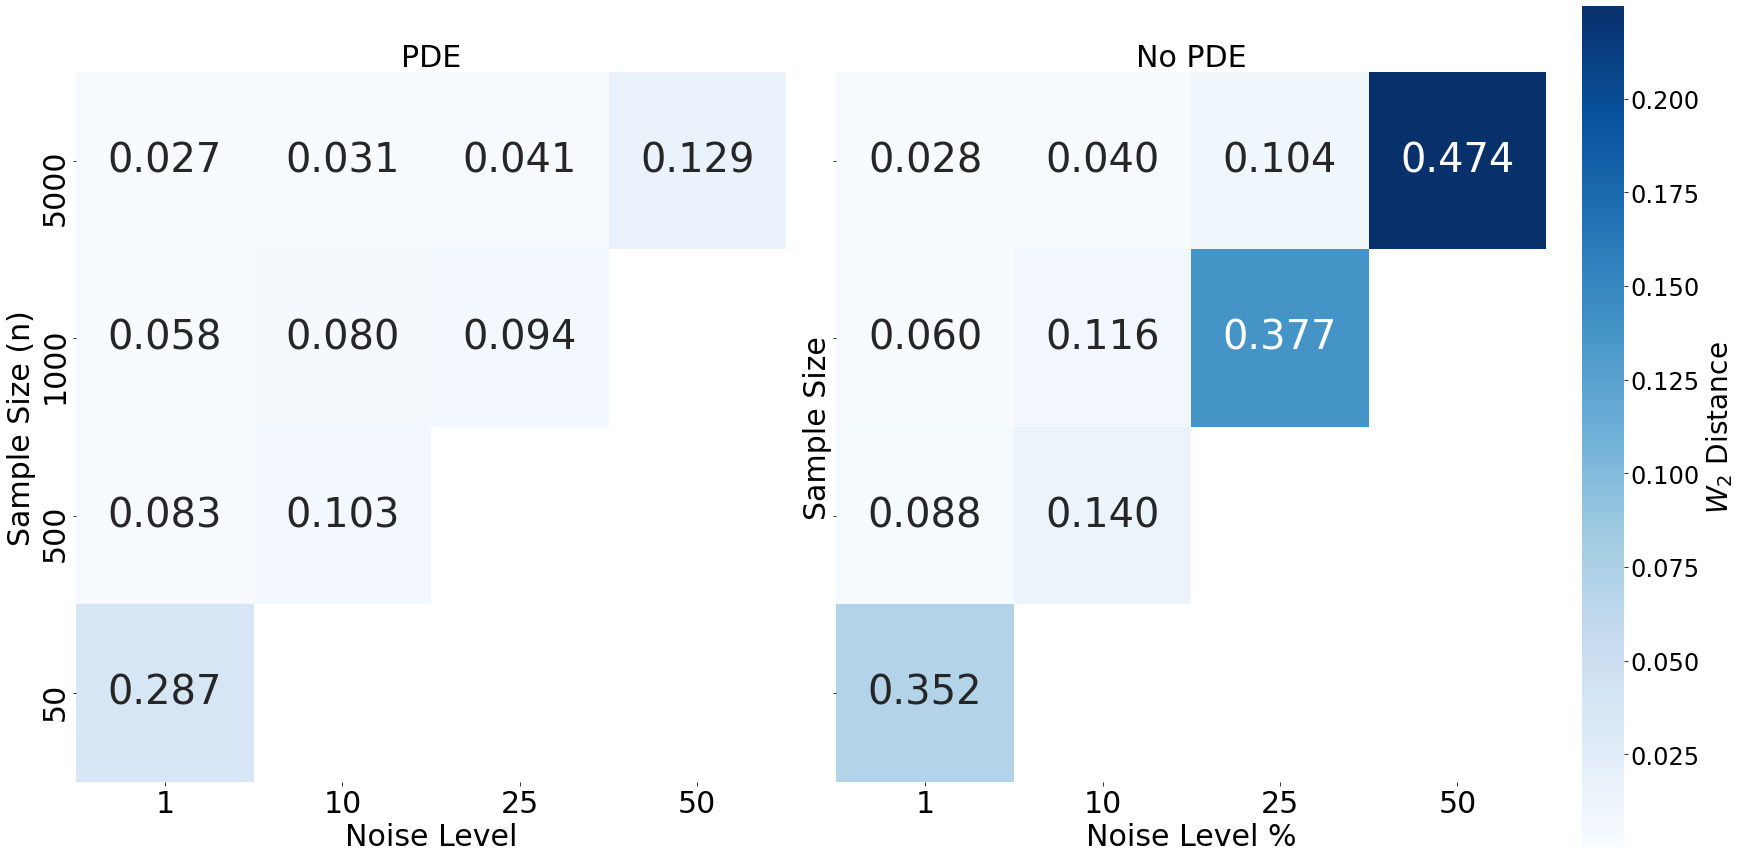

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df_results is the DataFrame with all the necessary statistics
# Convert the 'noise lv' column to string and then extract numbers
df_results['noise lv'] = df_results['noise lv'].astype(str).str.extract('(\d+)').astype(int)

# Pivot the data for easier plotting
df_pde = df_results[df_results['pde/nopde'] == 'pde']
df_nopde = df_results[df_results['pde/nopde'] == 'nopde']

# Function to create a pivot table
def create_pivot_table(df, value_col, index_col, columns_col):
    pivot = df.pivot(index=index_col, columns=columns_col, values=value_col)
    return pivot.sort_index(ascending=True).sort_index(axis=1)

# Create pivot tables for W2 distances and RMSE
pivot_pde_w2 = create_pivot_table(df_pde, 'W2_dists', 'n', 'noise lv')
pivot_pde_rmse = create_pivot_table(df_pde, 'rmse', 'n', 'noise lv')

pivot_nopde_w2 = create_pivot_table(df_nopde, 'W2_dists', 'n', 'noise lv')
pivot_nopde_rmse = create_pivot_table(df_nopde, 'rmse', 'n', 'noise lv')

# Ensure ascending order for both axes, then reverse the index to get low-to-high order from bottom to top
sample_sizes = sorted(df_results['n'].unique())
noise_levels = sorted(df_results['noise lv'].unique())

pivot_pde_w2 = pivot_pde_w2.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)
pivot_pde_rmse = pivot_pde_rmse.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)
pivot_nopde_w2 = pivot_nopde_w2.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)
pivot_nopde_rmse = pivot_nopde_rmse.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)

# Create the plot with a fixed aspect ratio for both subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 12), sharex=True, sharey=True, constrained_layout=True)

# Define the common color scale for both heatmaps
vmin = min(pivot_pde_w2.min().min(), pivot_nopde_w2.min().min())
vmax = max(pivot_pde_w2.max().max(), pivot_nopde_w2.max().max())

# Plot for pde
sns.heatmap(pivot_pde_w2, annot=pivot_pde_rmse, fmt=".3f", cmap="Blues", ax=axs[0], cbar=False, vmin=vmin, vmax=vmax, annot_kws={"size": 40}, square=True)
axs[0].set_title('PDE', fontsize=30)
axs[0].set_xlabel('Noise Level', fontsize=30)
axs[0].set_ylabel('Sample Size (n)', fontsize=30)
axs[0].tick_params(axis='both', which='major', labelsize=30)

# Plot for nopde
sns.heatmap(pivot_nopde_w2, annot=pivot_nopde_rmse, fmt=".3f", cmap="Blues", ax=axs[1], cbar_kws={'label': r'$W_2$ Distance'}, vmin=vmin, vmax=vmax, annot_kws={"size": 40}, square=True)
cbar = axs[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=24)
cbar.set_label(r'$W_2$ Distance', fontsize=28)
axs[1].set_title('No PDE', fontsize=30)
axs[1].set_xlabel('Noise Level %', fontsize=30)
axs[1].set_ylabel('Sample Size', fontsize=30)
axs[1].tick_params(axis='both', which='major', labelsize=30)

# Save the plot
plt.savefig('comparison_pde_nopde.pdf', format='pdf', dpi=300)

# Show the plot
plt.show()


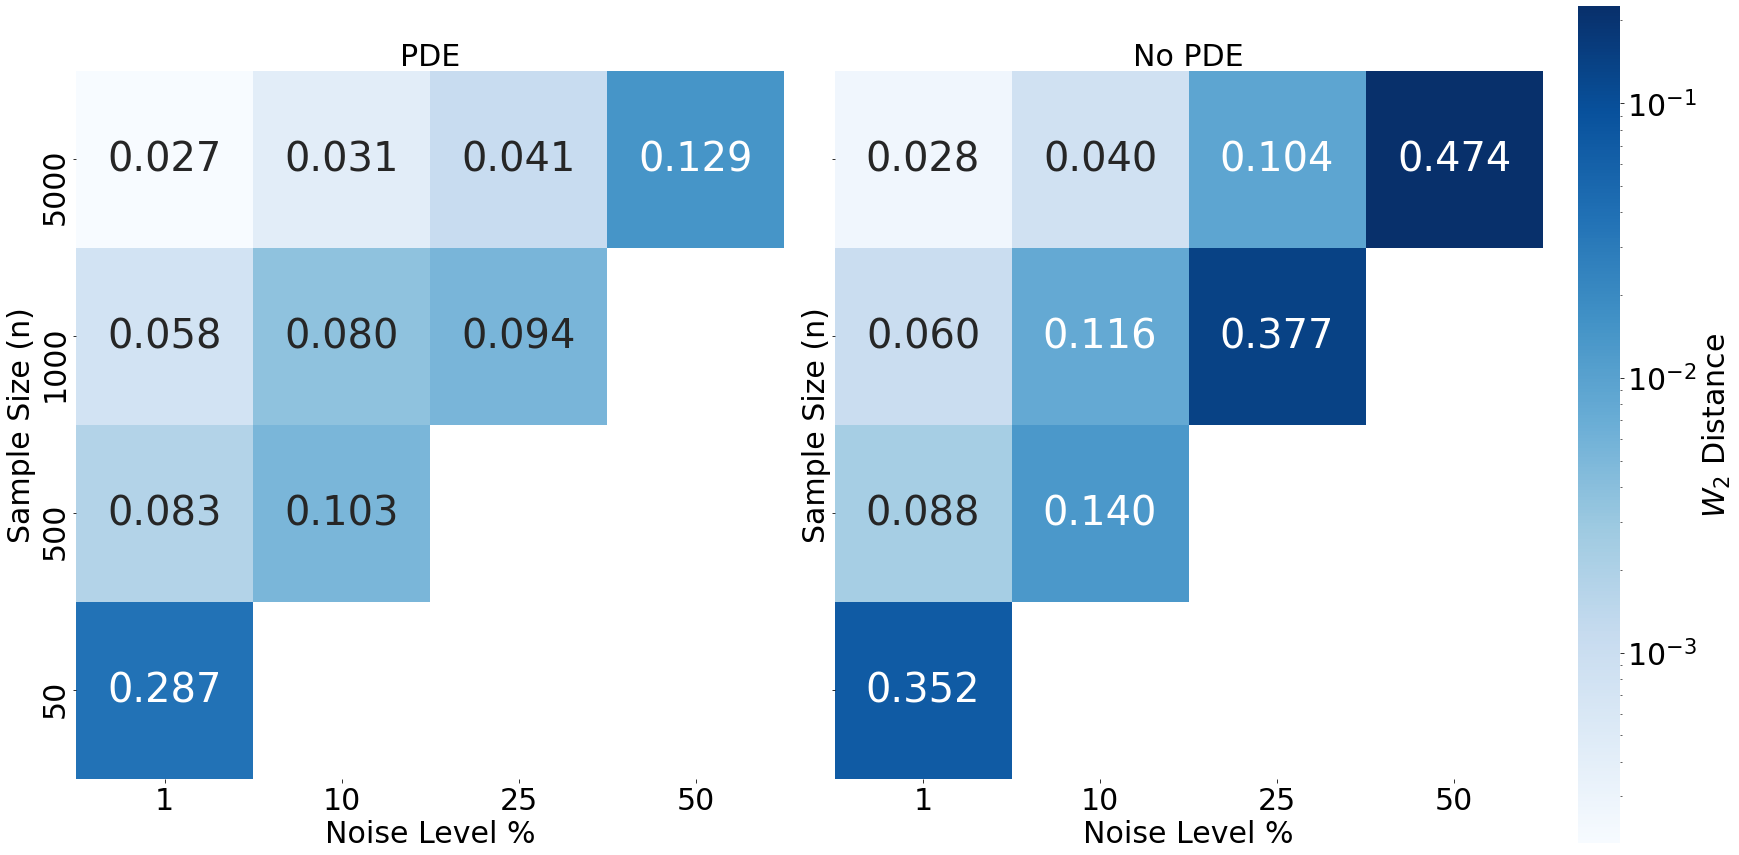

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm

# Assuming df_results is the DataFrame with all the necessary statistics
# Convert the 'noise lv' column to string and then extract numbers
df_results['noise lv'] = df_results['noise lv'].astype(str).str.extract('(\d+)').astype(int)

# Pivot the data for easier plotting
df_pde = df_results[df_results['pde/nopde'] == 'pde']
df_nopde = df_results[df_results['pde/nopde'] == 'nopde']

# Function to create a pivot table
def create_pivot_table(df, value_col, index_col, columns_col):
    pivot = df.pivot(index=index_col, columns=columns_col, values=value_col)
    return pivot.sort_index(ascending=True).sort_index(axis=1)

# Create pivot tables for W2 distances and RMSE
pivot_pde_w2 = create_pivot_table(df_pde, 'W2_dists', 'n', 'noise lv')
pivot_pde_rmse = create_pivot_table(df_pde, 'rmse', 'n', 'noise lv')

pivot_nopde_w2 = create_pivot_table(df_nopde, 'W2_dists', 'n', 'noise lv')
pivot_nopde_rmse = create_pivot_table(df_nopde, 'rmse', 'n', 'noise lv')

# Ensure ascending order for both axes, then reverse the index to get low-to-high order from bottom to top
sample_sizes = sorted(df_results['n'].unique())
noise_levels = sorted(df_results['noise lv'].unique())

pivot_pde_w2 = pivot_pde_w2.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)
pivot_pde_rmse = pivot_pde_rmse.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)
pivot_nopde_w2 = pivot_nopde_w2.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)
pivot_nopde_rmse = pivot_nopde_rmse.reindex(sample_sizes[::-1]).reindex(columns=noise_levels)

# Create the plot with a fixed aspect ratio for both subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 12), sharex=True, sharey=True, constrained_layout=True)

# Define the common color scale for both heatmaps using a logarithmic scale
norm = LogNorm(vmin=min(pivot_pde_w2.min().min(), pivot_nopde_w2.min().min()), vmax=max(pivot_pde_w2.max().max(), pivot_nopde_w2.max().max()))

# Plot for pde
sns.heatmap(pivot_pde_w2, annot=pivot_pde_rmse, fmt=".3f", cmap="Blues", ax=axs[0], cbar=False, norm=norm, annot_kws={"size": 40}, square=True)
axs[0].set_title('PDE', fontsize=30)
axs[0].set_xlabel('Noise Level %', fontsize=30)
axs[0].set_ylabel('Sample Size (n)', fontsize=30)
axs[0].tick_params(axis='both', which='major', labelsize=30)

# Plot for nopde
sns.heatmap(pivot_nopde_w2, annot=pivot_nopde_rmse, fmt=".3f", cmap="Blues", ax=axs[1], cbar_kws={'label': r'$W_2$ Distance'}, norm=norm, annot_kws={"size": 40}, square=True)
cbar = axs[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=30)
cbar.set_label(r'$W_2$ Distance', fontsize=30)
axs[1].set_title('No PDE', fontsize=30)
axs[1].set_xlabel('Noise Level %', fontsize=30)
axs[1].set_ylabel('Sample Size (n)', fontsize=30)
axs[1].tick_params(axis='both', which='major', labelsize=30)

# Save the plot
plt.savefig('comparison_pde_nopde.pdf', format='pdf', dpi=300)

# Show the plot
plt.show()
